In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


# load data

In [34]:
#Create data object
df = pd.read_csv("car_sales_data.csv")
df.head()


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


# preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [36]:
df.isna().sum()



Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [37]:
df.duplicated().sum()

np.int64(12)

In [38]:
df[df.duplicated(keep=False)]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
2183,Ford,Mondeo,1.4,Diesel,1987,224569,883
5136,VW,Polo,1.2,Petrol,2003,10000,8024
5426,VW,Polo,1.2,Petrol,2003,10000,8024
5997,Toyota,Yaris,1.0,Petrol,1996,13500,5087
6033,VW,Passat,1.8,Diesel,1996,13500,9394
8881,BMW,Z4,2.4,Petrol,1999,12000,13410
9862,Ford,Mondeo,1.4,Diesel,1987,224569,883
11785,VW,Polo,1.0,Petrol,2000,11500,5950
14745,BMW,Z4,2.4,Petrol,1999,12000,13410
18313,VW,Polo,1.2,Petrol,2021,1000,27901


In [39]:
df[df.duplicated]

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
5426,VW,Polo,1.2,Petrol,2003,10000,8024
9862,Ford,Mondeo,1.4,Diesel,1987,224569,883
14745,BMW,Z4,2.4,Petrol,1999,12000,13410
19020,Toyota,Yaris,1.0,Petrol,1996,13500,5087
19337,VW,Polo,1.0,Petrol,2000,11500,5950
23927,VW,Polo,1.2,Petrol,2021,1000,27901
25368,VW,Golf,1.2,Diesel,2011,6000,17401
28576,VW,Polo,1.2,Petrol,2003,10000,8024
34246,VW,Passat,2.0,Diesel,2003,10000,16087
35647,Ford,Focus,1.6,Petrol,2019,2000,39636


In [40]:
# drop dublicated value
df.drop_duplicates(inplace = True)
df.duplicated().sum()

np.int64(0)

In [41]:
#check dublicated values again
df[df.duplicated()]


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price


In [42]:
#check summery statistics
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,13829.112387
std,0.734149,9.646056,71624.341062,16417.812203
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54375.250000,3059.750000
50%,1.600000,2004.000000,101011.500000,7971.000000
75%,2.000000,2012.000000,158617.250000,19028.500000
max,5.000000,2022.000000,453537.000000,168081.000000


# EDA

In [43]:
# select numerical columna
numerical_df = df.select_dtypes(include=['int64','float64'])
numerical_df.columns

Index(['Engine size', 'Year of manufacture', 'Mileage', 'Price'], dtype='object')

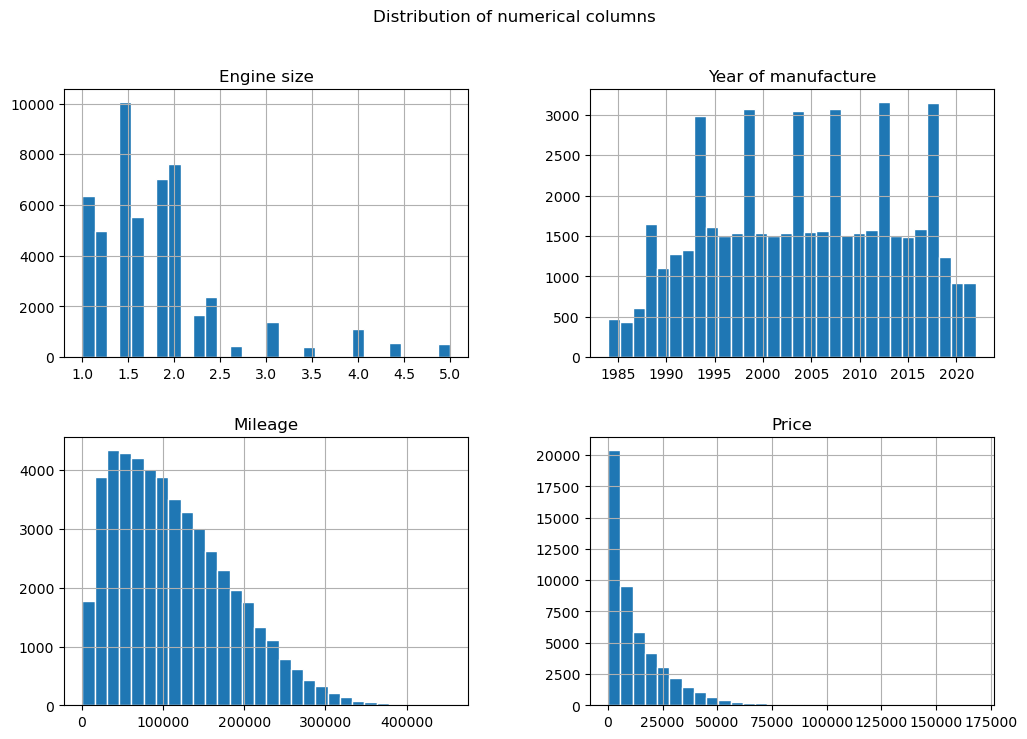

In [51]:
#histograms 
numerical_df.hist(figsize=(12,8),bins=30,edgecolor='white')
plt.suptitle("Distribution of numerical columns")
plt.show()


In [56]:
#checking outliers
outliers_dict = {}
for col in numerical_df.columns:
    Q1 = numerical_df[col].quantile(0.25)
    Q3 = numerical_df[col].quantile(0.75)
    IQR = Q3-Q1

    #lower bound and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #find outliers
    outliers = numerical_df[(numerical_df[col]< lower_bound) | (numerical_df[col] > upper_bound)]
    outliers_dict[col] = outliers
    
#print outliers
for col,outliers in outliers_dict.items():
    print(f"\nOutliers in '{col}':")
    print(outliers)

    
    
    


Outliers in 'Engine size':
       Engine size  Year of manufacture  Mileage   Price
1              4.0                 2016    57850   49704
26             3.5                 2005   151556   19747
41             4.0                 2017    22759   97758
99             4.4                 1987   226046    2956
101            4.4                 2008   109941   31711
...            ...                  ...      ...     ...
49938          4.0                 2015    47256   74105
49941          4.0                 2006   104899   18426
49966          3.0                 2006   106873   14336
49976          4.0                 1994   211856    5106
49995          5.0                 2018    28664  113006

[3951 rows x 4 columns]

Outliers in 'Year of manufacture':
Empty DataFrame
Columns: [Engine size, Year of manufacture, Mileage, Price]
Index: []

Outliers in 'Mileage':
       Engine size  Year of manufacture  Mileage  Price
85             1.0                 1993   333629    478
369  

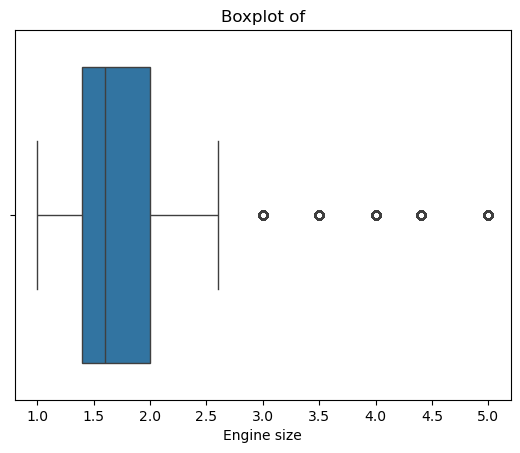

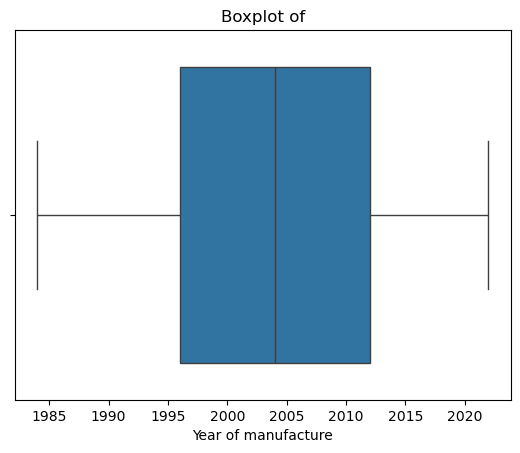

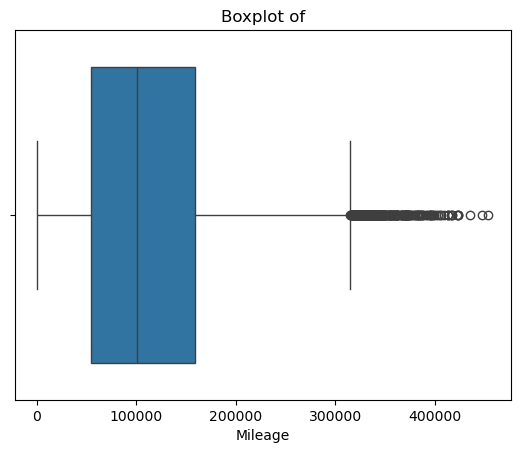

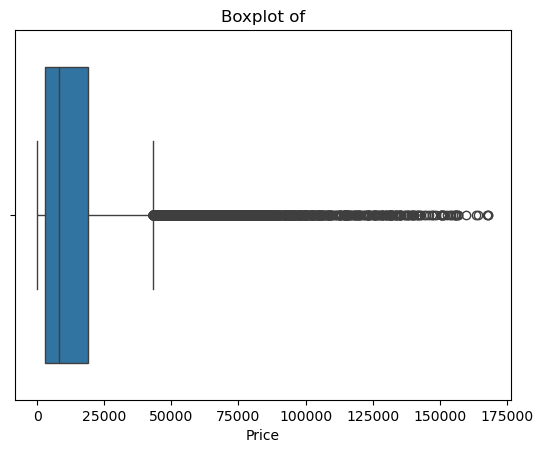

In [57]:
# boxplot
for col in numerical_df.columns:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of")
    plt.show()

In [62]:
df_correlation = df.corr()

ValueError: could not convert string to float: 'Ford'

In [63]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Now compute correlation on numeric columns onlya
df_correlation = numeric_df.corr()

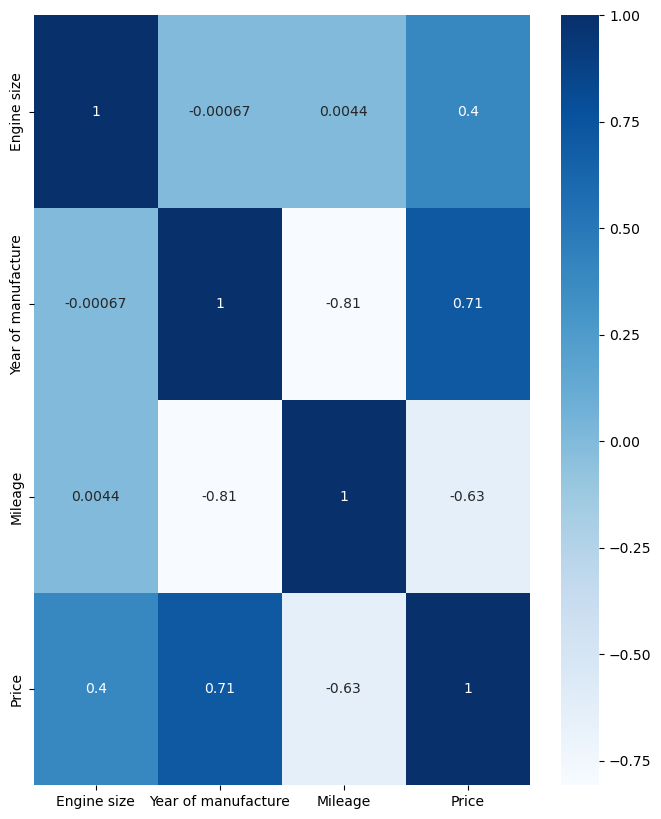

In [70]:
plt.figure(figsize=(8,10))
sns.heatmap(df_correlation,annot=True, cmap="Blues")
plt.show()

In [74]:
#categorical overview
for col in ["Manufacturer" , "Model" , "Fuel type"]:
    print(f"\nTop {col}s:")
    print(df[col].value_counts().head(5))


Top Manufacturers:
Manufacturer
Ford       14956
VW         14906
Toyota     12553
BMW         4964
Porsche     2609
Name: count, dtype: int64

Top Models:
Model
Mondeo    5057
Golf      5049
Polo      4988
Focus     4975
Fiesta    4924
Name: count, dtype: int64

Top Fuel types:
Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64


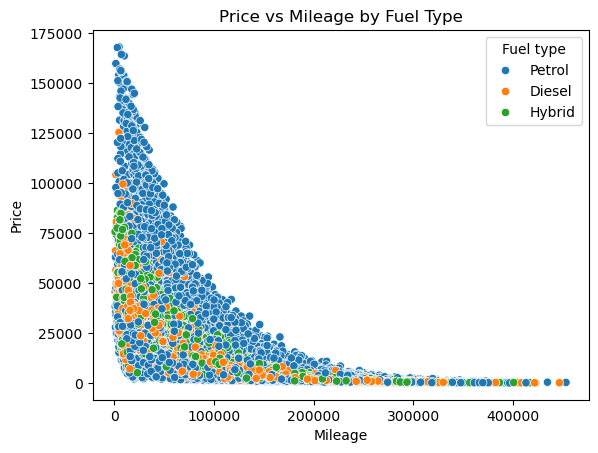

In [76]:
# price vs mileage
sns.scatterplot(data=df, x="Mileage" ,y="Price" , hue="Fuel type")
plt.title("Price vs Mileage by Fuel Type")
plt.show()


# preprocessing

In [78]:
# feature selection
X= df.drop("Price", axis=1)
y=df["Price"]
print(f"X:\n{X.head()}")
print(f"y:\n{y.head()}")

X:
  Manufacturer       Model  Engine size Fuel type  Year of manufacture  \
0         Ford      Fiesta          1.0    Petrol                 2002   
1      Porsche  718 Cayman          4.0    Petrol                 2016   
2         Ford      Mondeo          1.6    Diesel                 2014   
3       Toyota        RAV4          1.8    Hybrid                 1988   
4           VW        Polo          1.0    Petrol                 2006   

   Mileage  
0   127300  
1    57850  
2    39190  
3   210814  
4   127869  
y:
0     3074
1    49704
2    24072
3     1705
4     4101
Name: Price, dtype: int64


In [79]:
encoded_df = pd.get_dummies(df, columns=['Fuel type'])
print(encoded_df)


      Manufacturer       Model  Engine size  Year of manufacture  Mileage  \
0             Ford      Fiesta          1.0                 2002   127300   
1          Porsche  718 Cayman          4.0                 2016    57850   
2             Ford      Mondeo          1.6                 2014    39190   
3           Toyota        RAV4          1.8                 1988   210814   
4               VW        Polo          1.0                 2006   127869   
...            ...         ...          ...                  ...      ...   
49995          BMW          M5          5.0                 2018    28664   
49996       Toyota       Prius          1.8                 2003   105120   
49997         Ford      Mondeo          1.6                 2022     4030   
49998         Ford       Focus          1.0                 2016    26468   
49999           VW        Golf          1.4                 2012   109300   

        Price  Fuel type_Diesel  Fuel type_Hybrid  Fuel type_Petrol  
0    

In [83]:
from sklearn.preprocessing import LabelEncoder
